In [85]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as se
import matplotlib as mpl

In [2]:
df = pd.read_csv('general.csv')

In [3]:
df.head()

,cost,distance,delivery_time_hours,quantity,transport_mode,segment,customer_type,category,sub_category,city_x,city_y,store_type,departure_date,arrival_date,total_mass_kg,departure_season,arrival_season
0,10.10,13,48,9,Авиа,B2B,Физическое лицо,Спорттовары,Тренажеры,Сочи,Екатеринбург,Розничный,2023-03-25 09:18:00,2023-03-27 09:18:00,657.0,Весна,Весна
1,10.21,7,30,10,Морской,B2C,Физическое лицо,Электроника,Компьютеры,Москва,Краснодар,Розничный,2023-04-22 13:44:00,2023-04-23 19:44:00,22.0,Весна,Весна
2,10.25,17,8,5,Авиа,B2C,Физическое лицо,Одежда,Мужская,Санкт-Петербург,Екатеринбург,Розничный,2023-10-16 23:21:00,2023-10-17 07:21:00,1.5,Осень,Осень
3,10.26,15,23,9,Грузовик,B2C,Юридическое лицо,Одежда,Унисекс,Казань,Екатеринбург,Розничный,2024-01-01 03:08:00,2024-01-02 02:08:00,3.6,Зима,Зима
4,10.28,18,69,5,Грузовик,B2B,Физическое лицо,Одежда,Унисекс,Санкт-Петербург,Новосибирск,Розничный,2023-08-06 08:04:00,2023-08-09 05:04:00,0.9,Лето,Лето


In [24]:
num_vars = ['cost', 'distance', 'delivery_time_hours', 'quantity', 'total_mass_kg']

In [7]:
df.groupby('customer_type').count().iloc[:,0]

customer_type
Физическое лицо     14451
Юридическое лицо     3527
Name: cost, dtype: int64

In [13]:
phys = df[df['customer_type']=='Физическое лицо']
law = df[df['customer_type']=='Юридическое лицо']

In [ ]:
phys.describe()

,cost,distance,delivery_time_hours,quantity,total_mass_kg
count,14451.000000,14451.000000,14451.000000,14451.000000,14451.000000
mean,624.115544,499.276175,36.057920,5.509930,77.126073
std,436.261318,286.657388,20.807592,2.864136,153.456010
min,3.070000,5.000000,1.000000,1.000000,0.013000
25%,270.825000,250.000000,18.000000,3.000000,1.500000
50%,541.280000,499.000000,36.000000,5.000000,5.000000
75%,901.200000,748.000000,54.000000,8.000000,60.000000
max,1965.950000,1000.000000,72.000000,10.000000,730.000000


In [14]:
law.describe()

,cost,distance,delivery_time_hours,quantity,total_mass_kg
count,3527.000000,3527.000000,3527.000000,3527.000000,3527.000000
mean,630.788339,500.828183,36.488234,5.573859,78.888492
std,446.629337,290.992167,20.703805,2.891227,158.080151
min,3.140000,5.000000,1.000000,1.000000,0.013000
25%,261.925000,246.000000,18.000000,3.000000,1.500000
50%,538.880000,499.000000,37.000000,6.000000,5.000000
75%,914.405000,755.500000,54.000000,8.000000,63.000000
max,1948.450000,1000.000000,72.000000,10.000000,730.000000


In [16]:
phys.mode()

,cost,distance,delivery_time_hours,quantity,transport_mode,segment,customer_type,category,sub_category,city_x,city_y,store_type,departure_date,arrival_date,total_mass_kg,departure_season,arrival_season
0,169.01,47,19.0,7.0,Авиа,B2C,Физическое лицо,Электроника,Малая техника,Казань,Сочи,Розничный,2023-01-04 00:25:00,2023-09-21 06:06:00,1.5,Весна,Весна
1,302.66,758,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-12-13 05:37:00,NaN,NaN,NaN


In [17]:
law.mode()

,cost,distance,delivery_time_hours,quantity,transport_mode,segment,customer_type,category,sub_category,city_x,city_y,store_type,departure_date,arrival_date,total_mass_kg,departure_season,arrival_season
0,38.72,876.0,24.0,5.0,ЖД,B2C,Юридическое лицо,Электроника,Малая техника,Казань,Казань,Розничный,2023-02-08 13:25:00,2023-01-15 07:23:00,3.0,Лето,Лето
1,71.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-03-09 22:24:00,2023-03-03 00:59:00,NaN,NaN,NaN
2,77.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-03-28 19:06:00,2023-03-26 04:27:00,NaN,NaN,NaN
3,114.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-04-13 10:45:00,2023-04-04 15:27:00,NaN,NaN,NaN
4,152.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-04-14 09:32:00,2023-04-05 21:55:00,NaN,NaN,NaN
5,154.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-04-26 18:51:00,2023-06-24 10:30:00,NaN,NaN,NaN
6,155.39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-09 15:23:00,2023-06-30 01:55:00,NaN,NaN,NaN
7,168.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-24 14:45:00,2023-08-29 19:06:00,NaN,NaN,NaN
8,168.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-07-07 07:35:00,2023-11-18 09:55:00,NaN,NaN,NaN
9,168.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-08-19 14:34:00,NaN,NaN,NaN,NaN


In [53]:
df[num_vars+['city_x', 'transport_mode']].groupby(['city_x', 'transport_mode']).mean()

cost    distance  delivery_time_hours  \
city_x          transport_mode                                                
Казань          Авиа            615.192568  497.447130            36.021148   
                Грузовик        620.181399  500.069202            36.402281   
                ЖД              629.380409  504.388321            36.065693   
                Морской         656.505752  521.640777            35.511327   
Москва          Авиа            641.764192  511.688865            36.358079   
                Грузовик        601.795011  481.612108            36.820628   
                ЖД              629.192946  509.392405            35.737629   
                Морской         615.491895  481.746187            36.625272   
Нижний Новгород Авиа            588.730954  475.826464            35.657267   
                Грузовик        640.246916  513.151982            38.354626   
                ЖД              628.216578  499.507726            36.852097   
                Морской         615.662767  511.966457            37.379455   
Новосибирск     Авиа            621.812484  505.788009            35.092077   
                Грузовик        604.191732  488.190789            36.046053   
                ЖД              595.673777  481.023857            35.675944   
                Морской         609.615952  485.416867            36.342169   
Санкт-Петербург Авиа            637.921537  519.022936            37.050459   
                Грузовик        636.337365  503.237647            35.696471   
                ЖД              597.551948  468.220657            34.779343   
                Морской         629.552055  502.534591            35.628931   
Сочи            Авиа            653.438468  504.574468            34.946809   
                Грузовик        594.220475  477.683223            36.451435   
                ЖД              656.484170  514.881637            37.167035   
                Морской         634.712260  500.396588            35.438166   

                                quantity  total_mass_kg  
city_x          transport_mode                           
Казань          Авиа            5.588369      79.758826  
                Грузовик        5.435741      72.048438  
                ЖД              5.517518      83.503235  
                Морской         5.495955      76.549273  
Москва          Авиа            5.546943      76.280285  
                Грузовик        5.468610      83.777399  
                ЖД              5.531646      78.787200  
                Морской         5.567538      86.244413  
Нижний Новгород Авиа            5.750542      86.624458  
                Грузовик        5.475771      67.555969  
                ЖД              5.262693      76.050477  
                Морской         5.366876      76.624080  
Новосибирск     Авиа            5.331906      82.430602  
                Грузовик        5.594298      71.471493  
                ЖД              5.689861      74.155573  
                Морской         5.467470      61.609458  
Санкт-Петербург Авиа            5.123853      74.309640  
                Грузовик        5.428235      77.046360  
                ЖД              5.776995      84.689547  
                Морской         5.572327      85.240161  
Сочи            Авиа            5.472340      69.943421  
                Грузовик        5.720751      76.977403  
                ЖД              5.603982      80.130773  
                Морской         5.544776      70.173311

In [54]:
df[num_vars+['city_x', 'transport_mode']].groupby(['city_x', 'transport_mode']).max()

cost  distance  delivery_time_hours  \
city_x          transport_mode                                           
Казань          Авиа            1959.49      1000                   72   
                Грузовик        1891.22      1000                   72   
                ЖД              1906.84      1000                   72   
                Морской         1943.51      1000                   72   
Москва          Авиа            1928.08      1000                   72   
                Грузовик        1868.92       995                   72   
                ЖД              1899.70      1000                   72   
                Морской         1948.45       998                   72   
Нижний Новгород Авиа            1929.56      1000                   72   
                Грузовик        1927.02      1000                   72   
                ЖД              1926.73       997                   72   
                Морской         1908.38      1000                   72   
Новосибирск     Авиа            1935.65       985                   72   
                Грузовик        1861.25       999                   72   
                ЖД              1902.28       997                   72   
                Морской         1936.85       998                   72   
Санкт-Петербург Авиа            1963.74      1000                   72   
                Грузовик        1916.60       995                   72   
                ЖД              1904.23      1000                   72   
                Морской         1901.84       998                   72   
Сочи            Авиа            1926.68      1000                   72   
                Грузовик        1938.19      1000                   72   
                ЖД              1965.95       999                   72   
                Морской         1925.74       997                   72   

                                quantity  total_mass_kg  
city_x          transport_mode                           
Казань          Авиа                  10          730.0  
                Грузовик              10          730.0  
                ЖД                    10          730.0  
                Морской               10          730.0  
Москва          Авиа                  10          730.0  
                Грузовик              10          700.0  
                ЖД                    10          730.0  
                Морской               10          730.0  
Нижний Новгород Авиа                  10          730.0  
                Грузовик              10          730.0  
                ЖД                    10          730.0  
                Морской               10          700.0  
Новосибирск     Авиа                  10          700.0  
                Грузовик              10          730.0  
                ЖД                    10          730.0  
                Морской               10          730.0  
Санкт-Петербург Авиа                  10          730.0  
                Грузовик              10          730.0  
                ЖД                    10          730.0  
                Морской               10          730.0  
Сочи            Авиа                  10          730.0  
                Грузовик              10          730.0  
                ЖД                    10          730.0  
                Морской               10          730.0

In [55]:
df[num_vars+['city_x', 'transport_mode']].groupby(['city_x', 'transport_mode']).min()

cost  distance  delivery_time_hours  quantity  \
city_x          transport_mode                                                  
Казань          Авиа            3.60         5                    1         1   
                Грузовик        6.19         6                    1         1   
                ЖД              3.82         5                    1         1   
                Морской         7.40         5                    1         1   
Москва          Авиа            3.49         5                    1         1   
                Грузовик        3.14         5                    1         1   
                ЖД              3.52         6                    1         1   
                Морской         7.83         7                    1         1   
Нижний Новгород Авиа            6.13         6                    1         1   
                Грузовик        4.94         9                    1         1   
                ЖД              6.01         8                    1         1   
                Морской         4.66         5                    1         1   
Новосибирск     Авиа            4.76         5                    1         1   
                Грузовик        5.53         6                    1         1   
                ЖД              4.77         5                    1         1   
                Морской         7.84         5                    1         1   
Санкт-Петербург Авиа            6.41         6                    1         1   
                Грузовик        4.85         5                    1         1   
                ЖД              4.21         6                    1         1   
                Морской         6.77         6                    1         1   
Сочи            Авиа            6.26         5                    1         1   
                Грузовик        4.13         5                    1         1   
                ЖД              3.07         6                    1         1   
                Морской         5.37         5                    1         1   

                                total_mass_kg  
city_x          transport_mode                 
Казань          Авиа                    0.026  
                Грузовик                0.013  
                ЖД                      0.013  
                Морской                 0.013  
Москва          Авиа                    0.026  
                Грузовик                0.013  
                ЖД                      0.013  
                Морской                 0.013  
Нижний Новгород Авиа                    0.030  
                Грузовик                0.013  
                ЖД                      0.013  
                Морской                 0.026  
Новосибирск     Авиа                    0.013  
                Грузовик                0.013  
                ЖД                      0.026  
                Морской                 0.013  
Санкт-Петербург Авиа                    0.013  
                Грузовик                0.013  
                ЖД                      0.013  
                Морской                 0.026  
Сочи            Авиа                    0.013  
                Грузовик                0.013  
                ЖД                      0.013  
                Морской                 0.013

In [28]:
df[num_vars+['city_x', 'transport_mode']].groupby(['city_x', 'transport_mode']).std()

cost    distance  delivery_time_hours  \
city_x          transport_mode                                                
Казань          Авиа            429.642620  283.984972            21.010910   
                Грузовик        433.918645  288.263032            20.694748   
                ЖД              442.747488  291.858010            20.989894   
                Морской         445.457345  284.054674            20.336817   
Москва          Авиа            430.396744  288.412653            20.731923   
                Грузовик        423.269773  281.661624            20.014285   
                ЖД              439.519831  289.998286            20.830957   
                Морской         452.190287  291.002036            20.337155   
Нижний Новгород Авиа            430.604863  286.274344            20.836311   
                Грузовик        445.226221  288.943743            21.407943   
                ЖД              436.151334  279.967702            20.966740   
                Морской         427.364833  287.822590            20.227297   
Новосибирск     Авиа            442.163762  290.286812            22.175221   
                Грузовик        412.730236  281.733287            21.624062   
                ЖД              439.050095  291.849309            20.444667   
                Морской         444.566260  294.013017            20.770044   
Санкт-Петербург Авиа            431.292849  288.448612            20.714418   
                Грузовик        447.264245  287.683391            20.705587   
                ЖД              431.888515  280.391614            21.323903   
                Морской         421.511844  279.265403            21.018965   
Сочи            Авиа            456.827815  287.180565            20.823958   
                Грузовик        427.207844  286.772052            20.916259   
                ЖД              452.468666  293.361486            20.178434   
                Морской         446.401429  287.059762            21.118230   

                                quantity  total_mass_kg  
city_x          transport_mode                           
Казань          Авиа            2.861724     156.827428  
                Грузовик        2.880856     146.561475  
                ЖД              2.840292     161.244441  
                Морской         2.894778     150.725745  
Москва          Авиа            2.895442     152.673548  
                Грузовик        2.897447     157.200437  
                ЖД              2.872959     159.107155  
                Морской         2.828680     161.474427  
Нижний Новгород Авиа            2.824702     169.235537  
                Грузовик        2.939130     141.793716  
                ЖД              2.874106     147.317522  
                Морской         2.841321     155.152599  
Новосибирск     Авиа            2.877900     158.538511  
                Грузовик        2.741599     148.901634  
                ЖД              2.906792     149.799003  
                Морской         2.984384     137.310748  
Санкт-Петербург Авиа            2.788858     154.873900  
                Грузовик        2.885414     154.619163  
                ЖД              2.834997     164.990942  
                Морской         2.826478     166.379027  
Сочи            Авиа            2.919269     144.712517  
                Грузовик        2.871916     157.800547  
                ЖД              2.851478     156.183549  
                Морской         2.858943     146.820554

In [38]:
df[num_vars+['city_x', 'transport_mode']].groupby(['city_x', 'transport_mode']).count().iloc[:,0]

city_x           transport_mode
Казань           Авиа              1324
                 Грузовик          1315
                 ЖД                1370
                 Морской           1236
Москва           Авиа               916
                 Грузовик           892
                 ЖД                 869
                 Морской            918
Нижний Новгород  Авиа               461
                 Грузовик           454
                 ЖД                 453
                 Морской            477
Новосибирск      Авиа               467
                 Грузовик           456
                 ЖД                 503
                 Морской            415
Санкт-Петербург  Авиа               436
                 Грузовик           425
                 ЖД                 426
                 Морской            477
Сочи             Авиа               940
                 Грузовик           906
                 ЖД                 904
                 Морской            938
Name: co

In [56]:
df[num_vars+['city_x', 'transport_mode']].groupby(['city_x', 'transport_mode']).median()

cost  distance  delivery_time_hours  \
city_x          transport_mode                                           
Казань          Авиа            539.520     498.5                 37.0   
                Грузовик        529.500     499.0                 37.0   
                ЖД              562.745     509.0                 36.0   
                Морской         563.720     520.0                 35.0   
Москва          Авиа            573.650     523.0                 36.0   
                Грузовик        510.690     473.5                 38.0   
                ЖД              534.540     502.0                 36.0   
                Морской         513.970     473.0                 38.0   
Нижний Новгород Авиа            496.460     469.0                 35.0   
                Грузовик        549.025     516.0                 39.0   
                ЖД              537.200     500.0                 35.0   
                Морской         518.270     511.0                 39.0   
Новосибирск     Авиа            519.780     523.0                 34.0   
                Грузовик        540.885     483.0                 37.0   
                ЖД              501.890     473.0                 34.0   
                Морской         528.810     476.0                 36.0   
Санкт-Петербург Авиа            571.360     512.0                 38.0   
                Грузовик        563.170     528.0                 35.0   
                ЖД              519.535     449.5                 31.0   
                Морской         552.890     509.0                 35.0   
Сочи            Авиа            564.430     509.5                 34.5   
                Грузовик        508.840     456.0                 37.0   
                ЖД              586.855     523.0                 37.0   
                Морской         537.065     501.0                 35.0   

                                quantity  total_mass_kg  
city_x          transport_mode                           
Казань          Авиа                 6.0           5.00  
                Грузовик             5.0           5.00  
                ЖД                   6.0           5.60  
                Морской              6.0           6.45  
Москва          Авиа                 6.0           4.90  
                Грузовик             5.0           5.40  
                ЖД                   6.0           4.90  
                Морской              6.0           5.88  
Нижний Новгород Авиа                 6.0           4.90  
                Грузовик             6.0           3.60  
                ЖД                   5.0           6.10  
                Морской              5.0           5.40  
Новосибирск     Авиа                 5.0           4.80  
                Грузовик             6.0           4.50  
                ЖД                   6.0           4.80  
                Морской              5.0           4.20  
Санкт-Петербург Авиа                 5.0           3.92  
                Грузовик             5.0           4.00  
                ЖД                   6.0           5.40  
                Морской              6.0           4.40  
Сочи            Авиа                 5.0           5.00  
                Грузовик             6.0           5.60  
                ЖД                   5.0           5.40  
                Морской              5.0           4.80

['Сочи',
 'Москва',
 'Санкт-Петербург',
 'Казань',
 'Новосибирск',
 'Нижний Новгород']

In [49]:
pd.Series(df.city_x.unique().tolist())

0               Сочи
1             Москва
2    Санкт-Петербург
3             Казань
4        Новосибирск
5    Нижний Новгород
dtype: object

In [52]:
pd.Series(df.city_y.unique().tolist())

0       Екатеринбург
1          Краснодар
2        Новосибирск
3        Калининград
4               Сочи
5             Москва
6             Казань
7    Санкт-Петербург
8        Владивосток
9    Нижний Новгород
dtype: object

In [57]:
spbdf = df[df['city_x'] == 'Санкт-Петербург']

In [60]:
spbdf['cost'].count()

np.int64(1764)

In [59]:
spb_corr = spbdf[num_vars].corr()
spb_corr.style.background_gradient(cmap='coolwarm')

,cost,distance,delivery_time_hours,quantity,total_mass_kg
cost,1.000000,0.813903,-0.055877,0.057688,-0.004211
distance,0.813903,1.000000,-0.060199,0.050345,0.002754
delivery_time_hours,-0.055877,-0.060199,1.000000,-0.050928,0.000520
quantity,0.057688,0.050345,-0.050928,1.000000,0.297584
total_mass_kg,-0.004211,0.002754,0.000520,0.297584,1.000000


In [61]:
spb_corr

,cost,distance,delivery_time_hours,quantity,total_mass_kg
cost,1.000000,0.813903,-0.055877,0.057688,-0.004211
distance,0.813903,1.000000,-0.060199,0.050345,0.002754
delivery_time_hours,-0.055877,-0.060199,1.000000,-0.050928,0.000520
quantity,0.057688,0.050345,-0.050928,1.000000,0.297584
total_mass_kg,-0.004211,0.002754,0.000520,0.297584,1.000000


In [68]:
spbdf['transport_mode'].unique()

array(['Авиа', 'Грузовик', 'Морской', 'ЖД'], dtype=object)

In [69]:
spb_avia = spbdf[spbdf['transport_mode'] == 'Авиа']
spb_truck = spbdf[spbdf['transport_mode'] == 'Грузовик']
spb_rail = spbdf[spbdf['transport_mode'] == 'ЖД']
spb_sea = spbdf[spbdf['transport_mode'] == 'Морской']

In [71]:
spb_avia[num_vars].corr()

,cost,distance,delivery_time_hours,quantity,total_mass_kg
cost,1.000000,0.803347,-0.052308,0.076456,-0.002141
distance,0.803347,1.000000,-0.034149,0.089254,0.015863
delivery_time_hours,-0.052308,-0.034149,1.000000,-0.068593,0.023958
quantity,0.076456,0.089254,-0.068593,1.000000,0.335288
total_mass_kg,-0.002141,0.015863,0.023958,0.335288,1.000000


In [73]:
spb_truck[num_vars].corr()

,cost,distance,delivery_time_hours,quantity,total_mass_kg
cost,1.000000,0.802605,-0.101688,-0.007484,-0.035261
distance,0.802605,1.000000,-0.124690,-0.002615,-0.007681
delivery_time_hours,-0.101688,-0.124690,1.000000,-0.015149,-0.051931
quantity,-0.007484,-0.002615,-0.015149,1.000000,0.280638
total_mass_kg,-0.035261,-0.007681,-0.051931,0.280638,1.000000


In [74]:
spb_rail[num_vars].corr()

,cost,distance,delivery_time_hours,quantity,total_mass_kg
cost,1.000000,0.847443,-0.008261,0.115189,0.046564
distance,0.847443,1.000000,-0.024205,0.112093,0.042825
delivery_time_hours,-0.008261,-0.024205,1.000000,-0.076713,-0.003017
quantity,0.115189,0.112093,-0.076713,1.000000,0.291845
total_mass_kg,0.046564,0.042825,-0.003017,0.291845,1.000000


In [75]:
spb_sea[num_vars].corr()

,cost,distance,delivery_time_hours,quantity,total_mass_kg
cost,1.000000,0.804454,-0.065394,0.061176,-0.022140
distance,0.804454,1.000000,-0.068106,0.027765,-0.030601
delivery_time_hours,-0.065394,-0.068106,1.000000,-0.033053,0.030084
quantity,0.061176,0.027765,-0.033053,1.000000,0.282329
total_mass_kg,-0.022140,-0.030601,0.030084,0.282329,1.000000


In [81]:
spb = spbdf[spbdf['city_y']!='Санкт-Петербург']

In [82]:
spb.groupby(['transport_mode', 'city_y']).count()['cost']

transport_mode  city_y         
Авиа            Владивосток        49
                Екатеринбург       44
                Казань             46
                Калининград        38
                Краснодар          43
                Москва             39
                Нижний Новгород    43
                Новосибирск        40
                Сочи               44
Грузовик        Владивосток        51
                Екатеринбург       41
                Казань             31
                Калининград        28
                Краснодар          40
                Москва             49
                Нижний Новгород    49
                Новосибирск        44
                Сочи               45
ЖД              Владивосток        40
                Екатеринбург       45
                Казань             39
                Калининград        28
                Краснодар          55
                Москва             31
                Нижний Новгород    45
                Но

In [86]:
spb.to_csv('spb_logistics.csv', index=False)

In [88]:
plt = mpl.pyplot

mpl.style.use('seaborn-v0_8-whitegrid')
se.set_palette('Set2')

In [95]:
transport_mode = spb.transport_mode.unique().tolist()
transport_mode

['Авиа', 'Грузовик', 'Морской', 'ЖД']

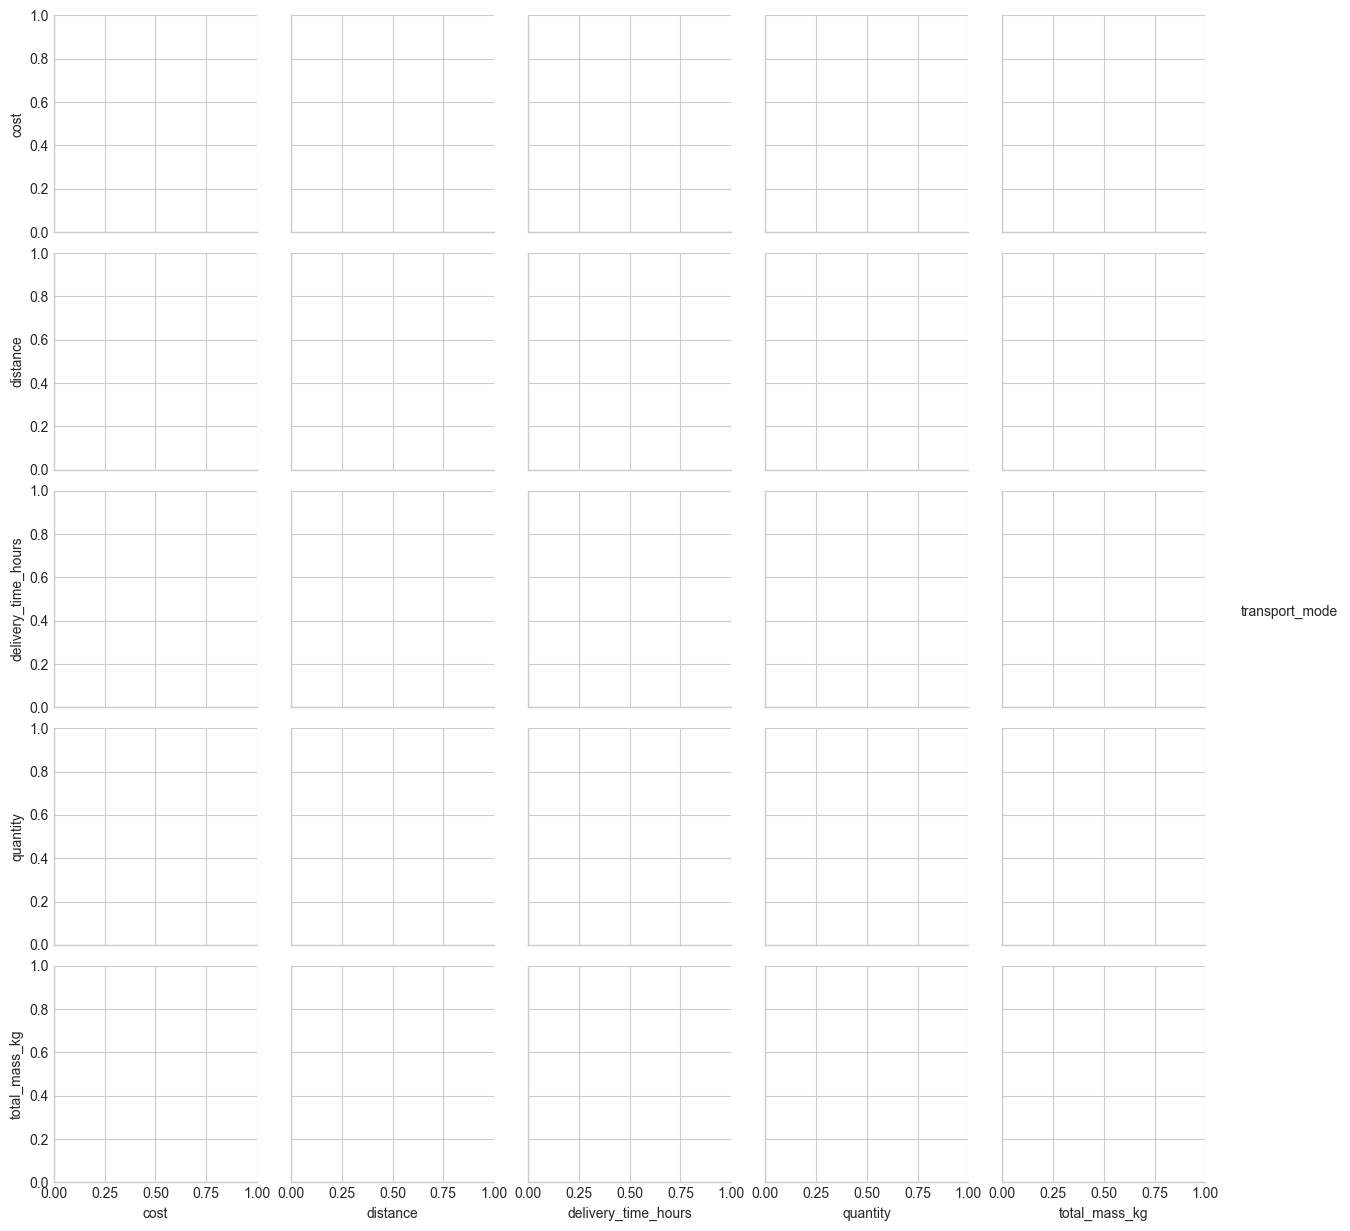

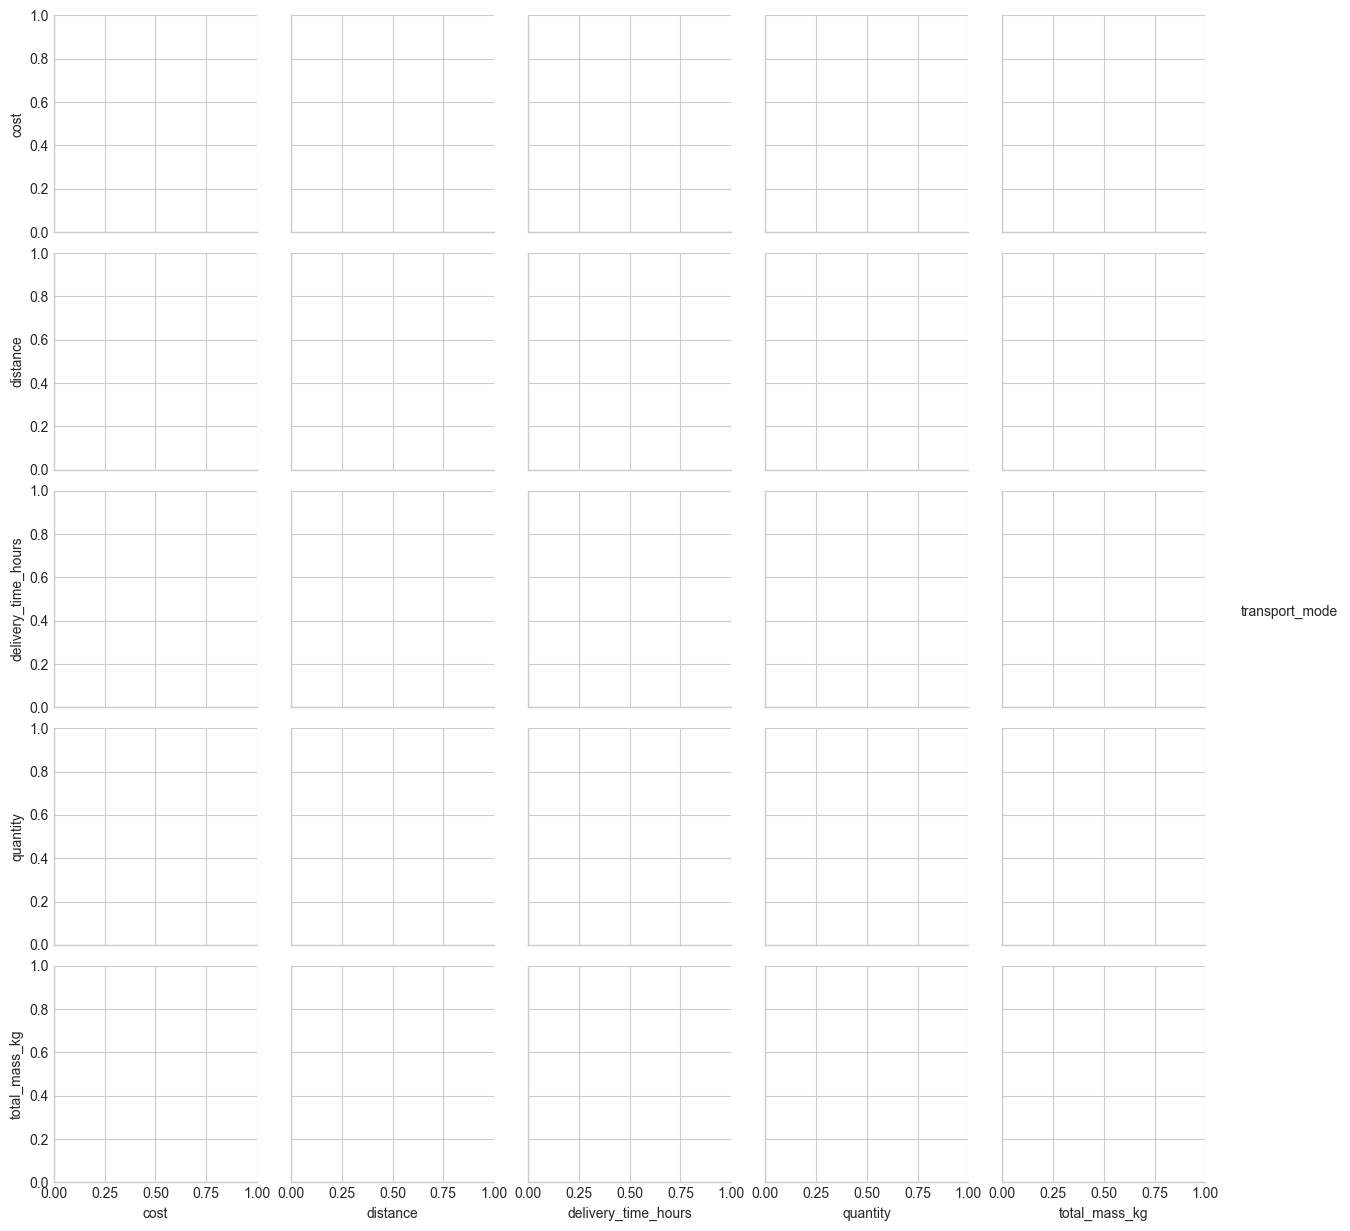

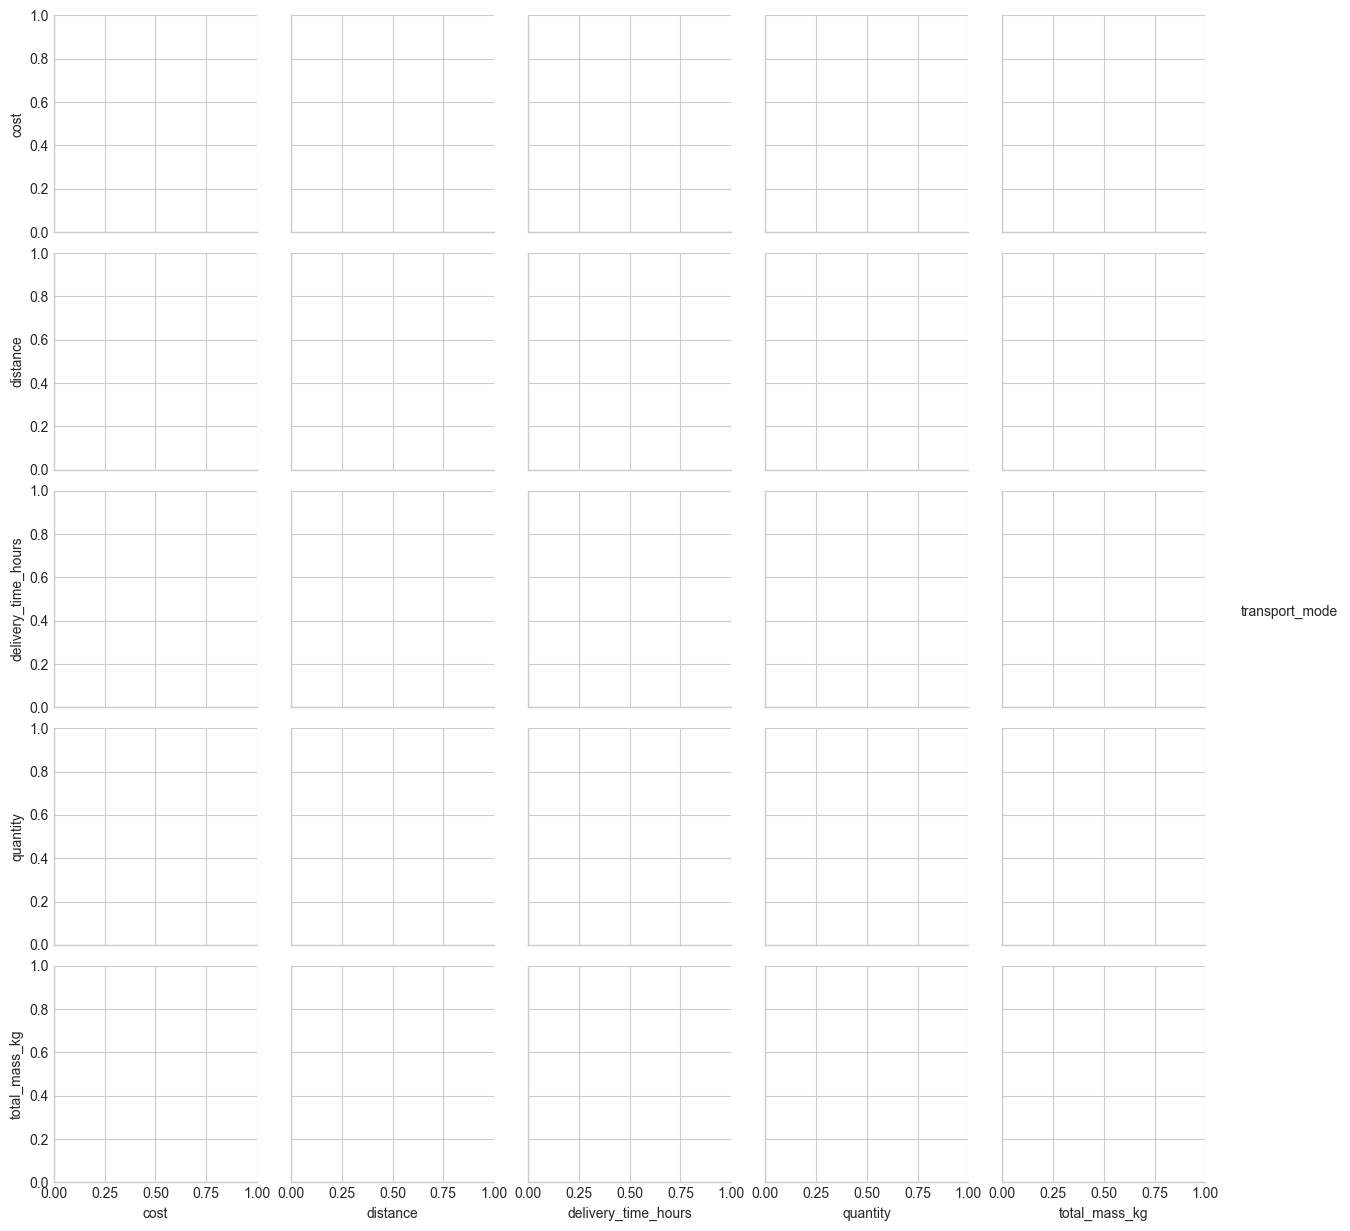

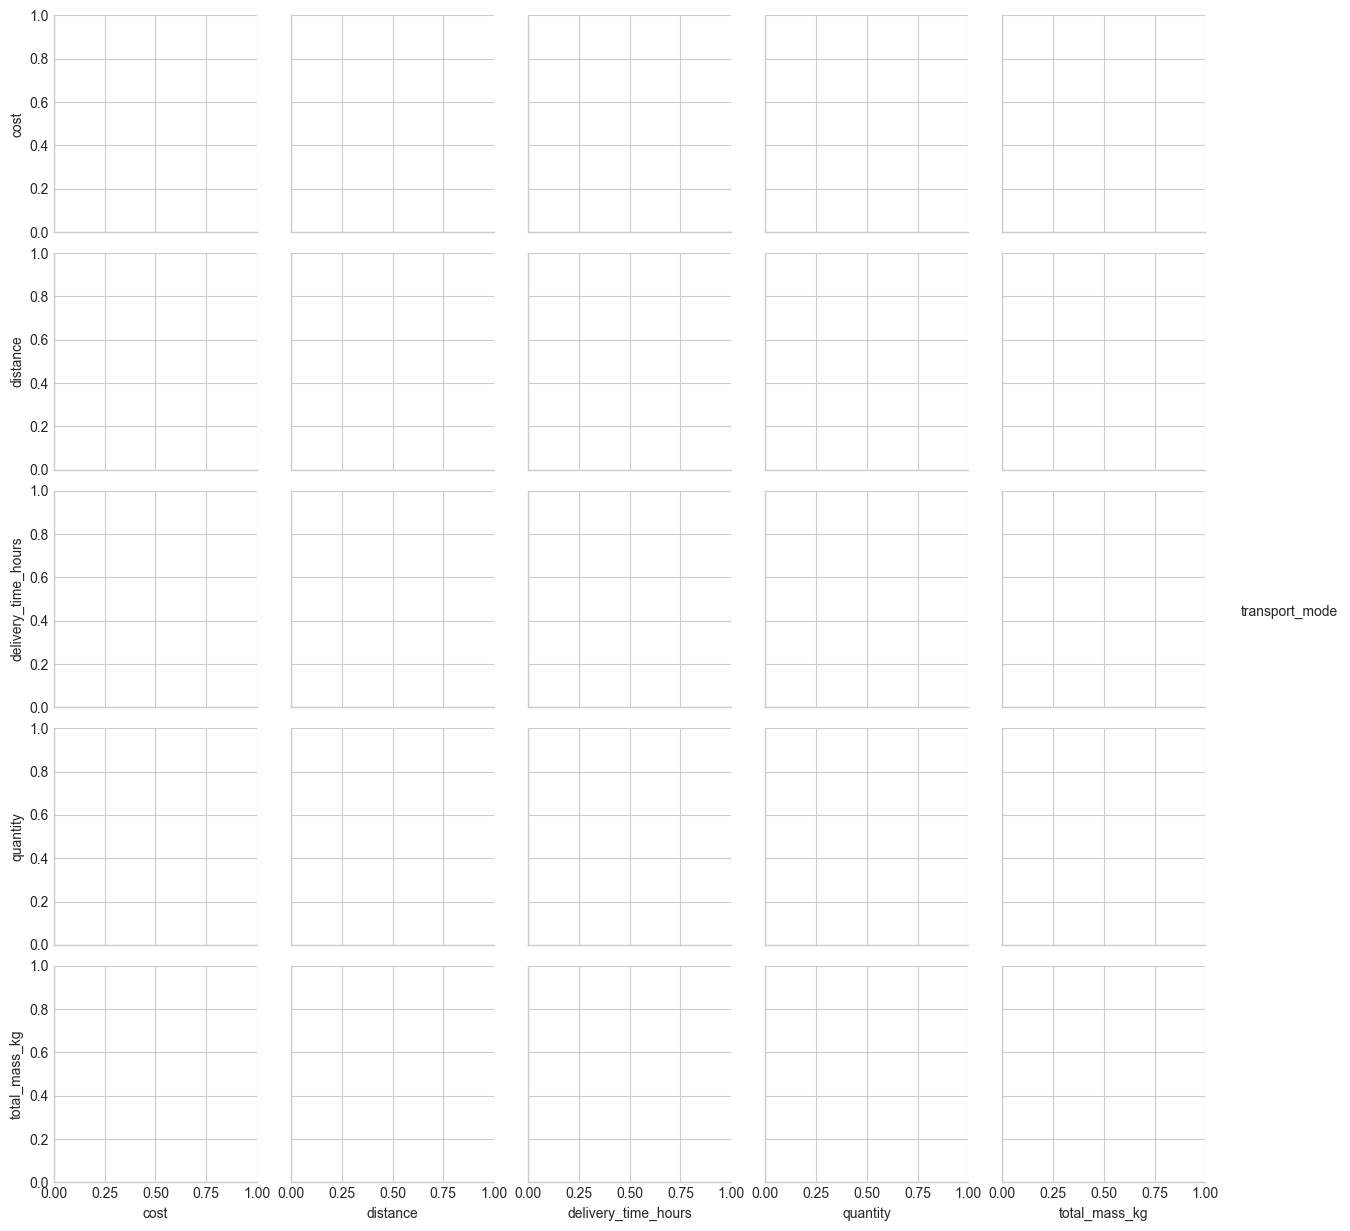

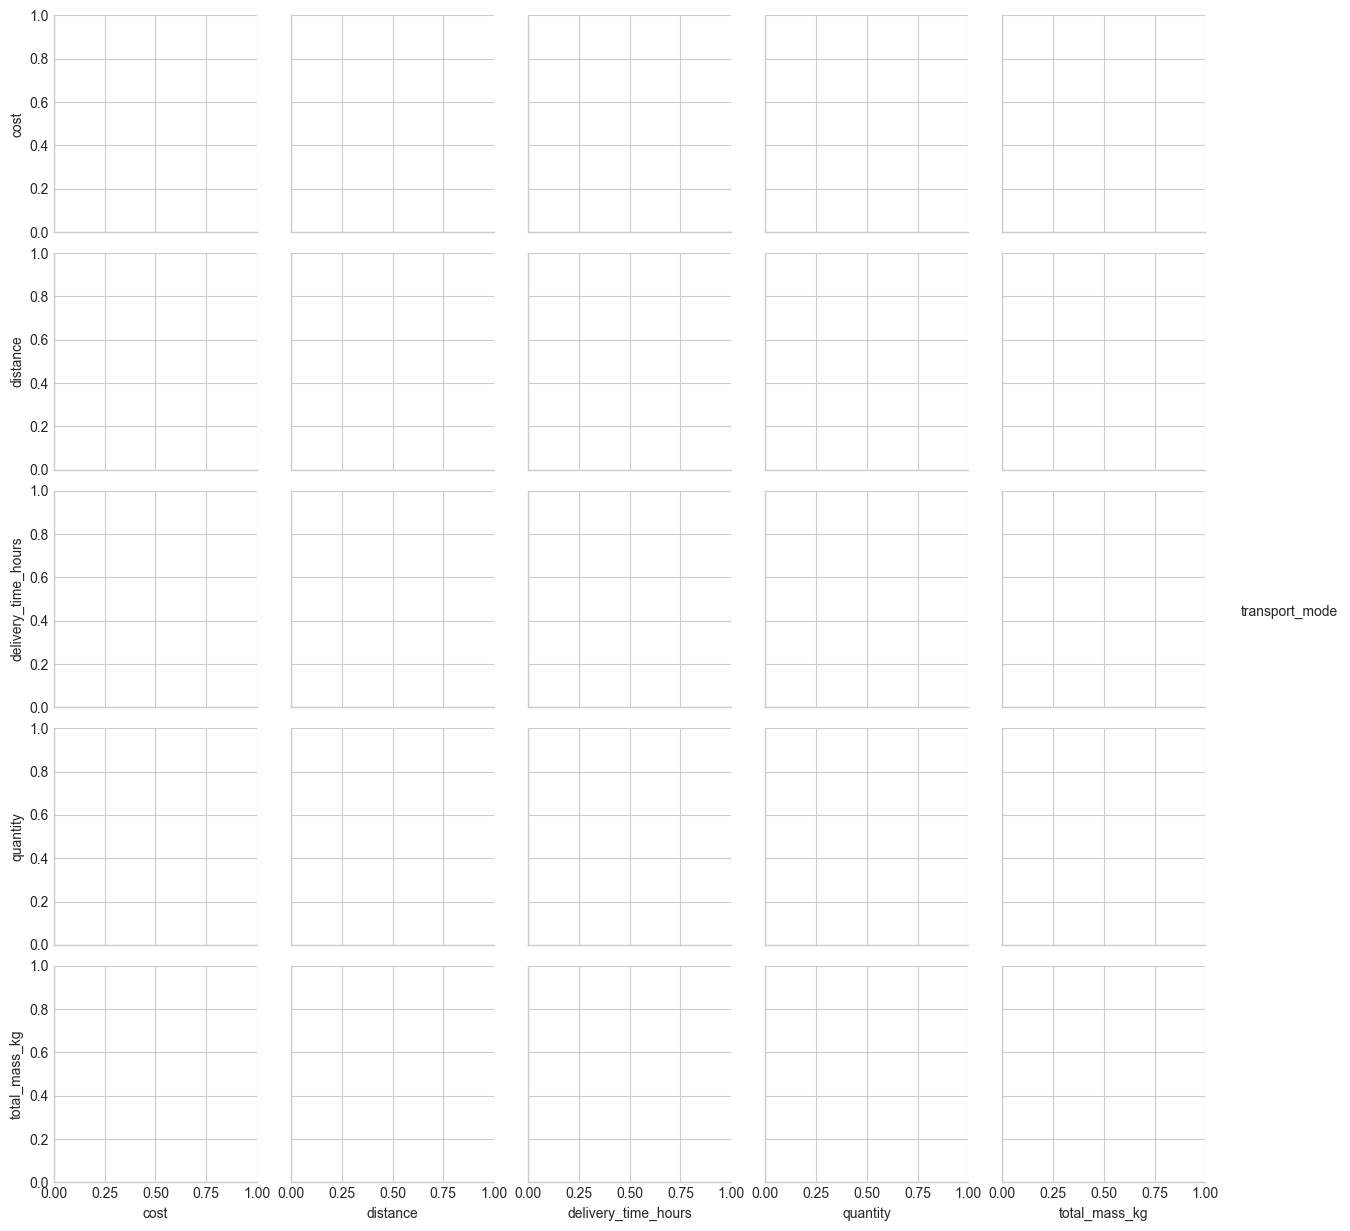

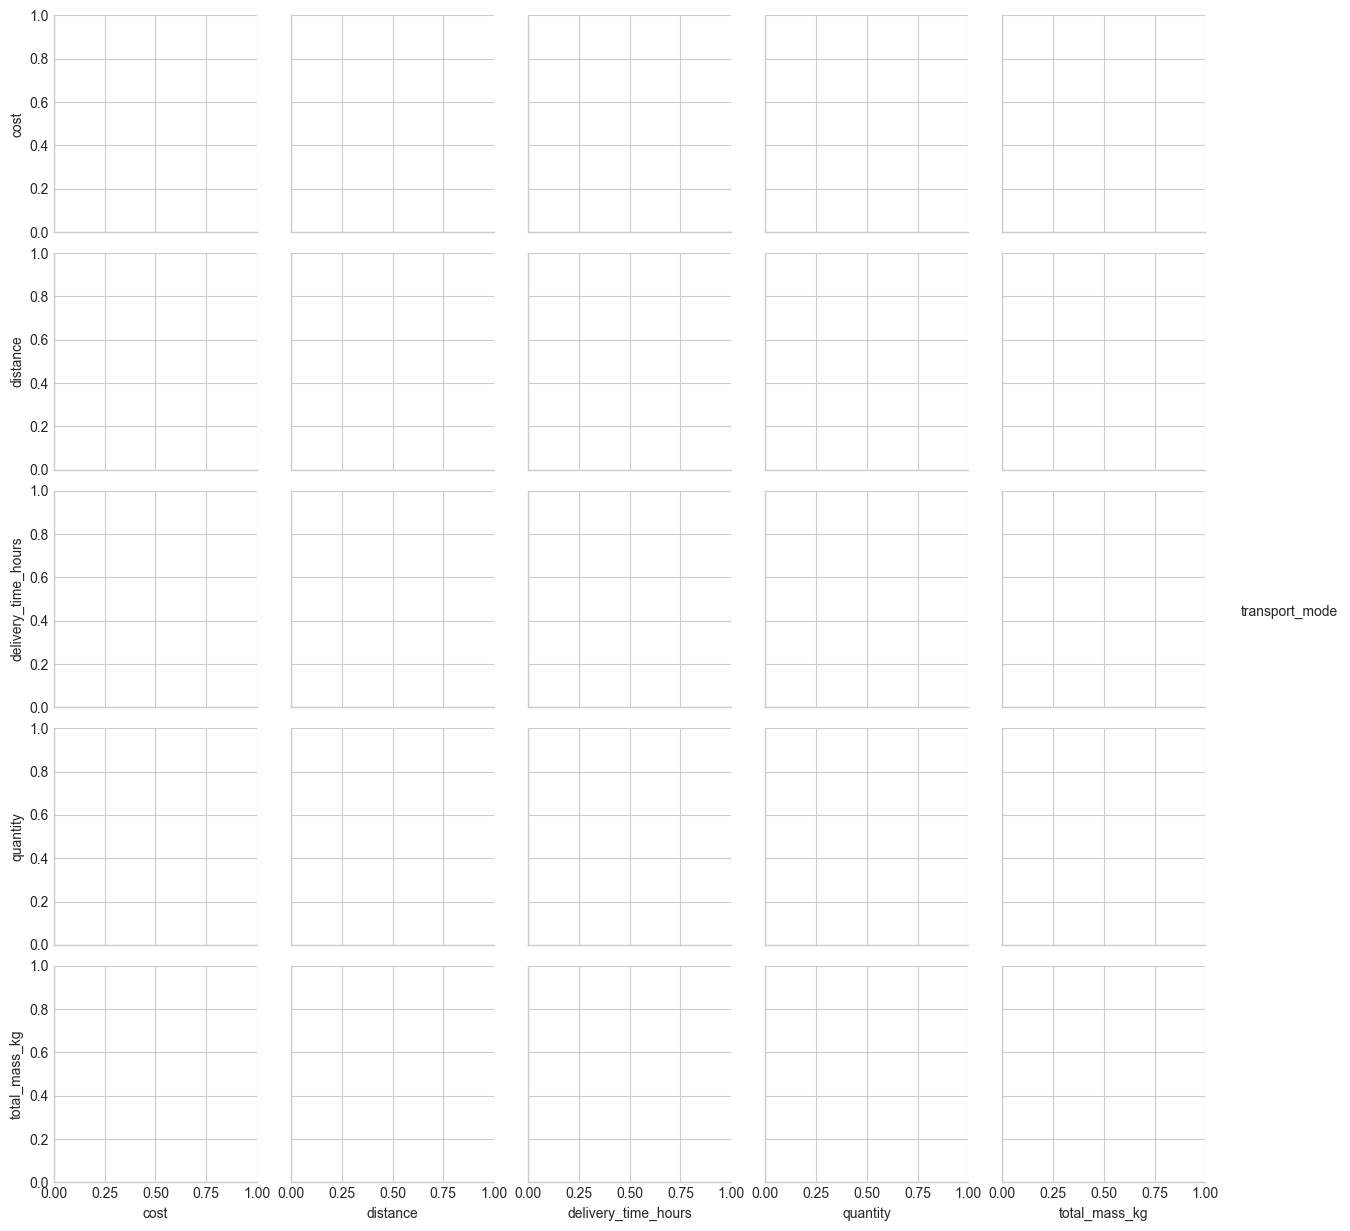

In [115]:
moded_plots = []
for mode in range(4):
	for mode2 in range(mode+1, 4):
		moded = spb[(spb['transport_mode']==transport_mode[mode]) & (spb['transport_mode']==transport_mode[mode2])]
		se.pairplot(moded[num_vars+['transport_mode']], hue='transport_mode')
		plt.show()	

In [114]:
for plot in moded_plots:
	plt.show(plot)

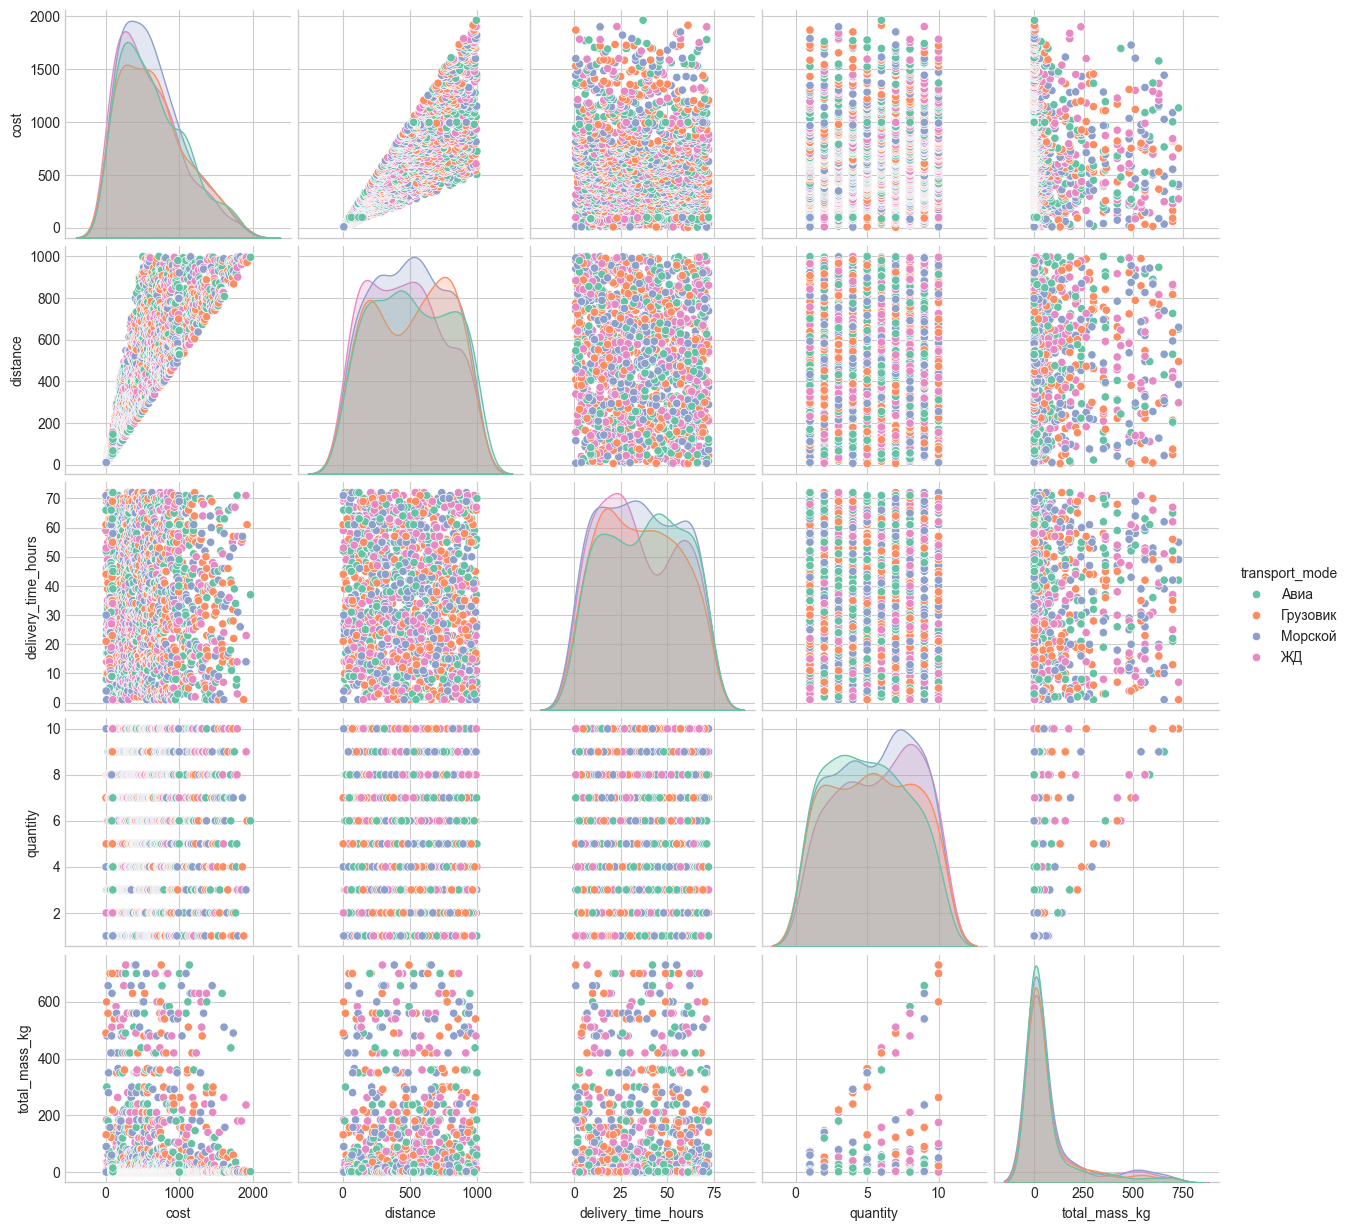

In [92]:
se.pairplot(spb[num_vars+['transport_mode']], hue='transport_mode')
plt.show()